In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
%matplotlib inline

In [46]:
ls

'Data inspection.ipynb'                              vdp_2d_entropy.npy
 vdp_100trajectories_2dim_500to20500_noise0.05.npz   vdp_2d_L.npy
 vdp_100trajectories_2dim_500to20500_noise0.2.npz    vdp_2d_mu.npy
 vdp_1trajectories_2dim_500to20500_noise0.05.npz     vdp_2d_n_obs.npy
 vdp_1trajectories_2dim_500to20500_noise0.2.npz      vdp_2d_pred.npy
 vdp_2d_A.npy


In [145]:
with np.load("vdp_1trajectories_2dim_500to20500_noise0.2.npz") as data:
    x = np.squeeze(data['x'])
    y = np.squeeze(data['y'])
    u = np.squeeze(data['u'])

In [146]:
print(f"{x.shape = }")
print(f"{y.shape = }")
print(f"{u.shape = }")

x.shape = (20000, 2)
y.shape = (20000, 2)
u.shape = (20000,)


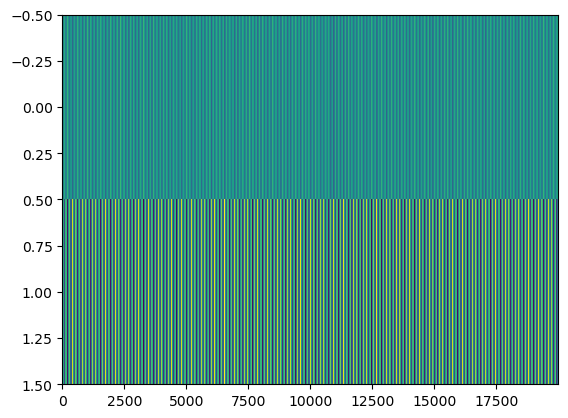

In [147]:
plt.imshow(np.squeeze(y.T), aspect='auto',interpolation='nearest')

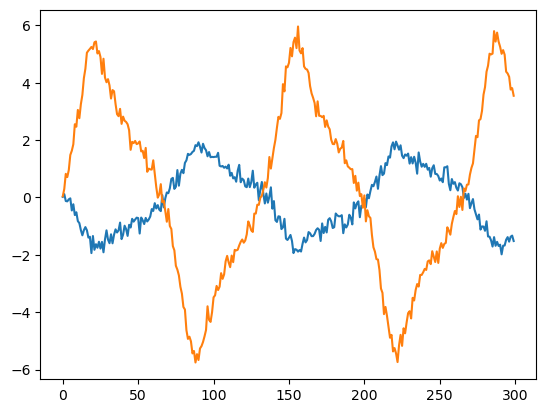

In [148]:
plt.plot(y[:300,:])

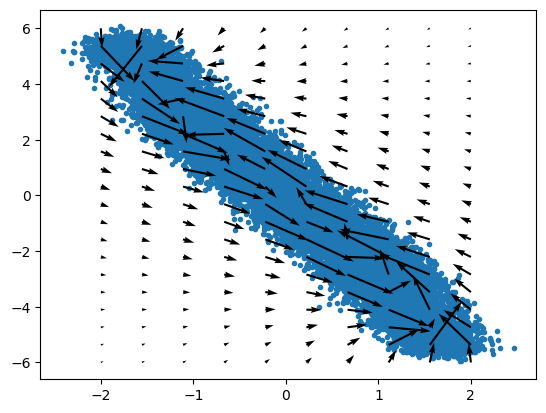

In [152]:
plt.plot(y[:,0], y[:,1], '.', zorder=0)

a, b = 10, 20
x_coords = np.linspace(-2,2,a)
y_coords = np.linspace(-6,6,b)
pts = np.vstack([np.repeat(x_coords,b),np.tile(y_coords,a)]).T

dy = np.diff(y, axis=0)

u = 1 * np.ones([a * b,2])




for i in range(u.shape[0]):
    u[i,:] = (dy / (np.maximum(np.linalg.norm(y[:-1,:] - pts[i,:], axis=1)[:,None], 0.05))**1).mean(axis=0)

plt.quiver(pts[:,0],pts[:,1],u[:,0],u[:,1])
plt.show()